#In this exercise, you'll be working with a dataset on house sales in King County, Washington. 
#You can get more information about this dataset 
#[here](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). 
#Our first goal is to build a predictive model for the sales price.
#We'll start with a simple model, one which uses just the square footage of living space as our only predictor variable.

In [36]:
import pandas as pd
import numpy as np

In [3]:
house_sales_df = pd.read_csv("C:/Users/billy/Documents/NSS_projects/ml-exercise-01-BillyBrothers/data/kc_house_data.csv")
house_sales_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


1. Before building the model, start by looking at a scatterplot of price vs. the square footage of living space. What do you find? How strong does the relationship appear to be?

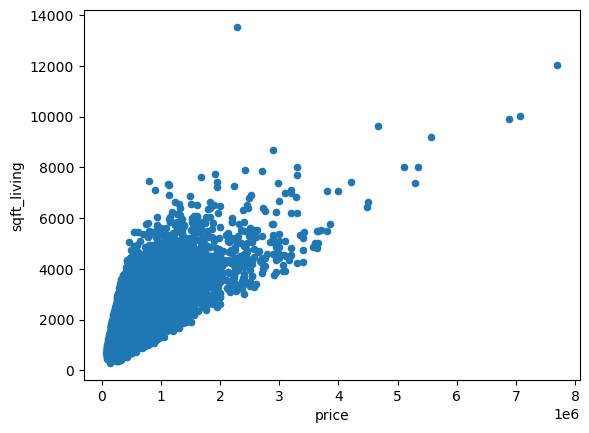

In [5]:
house_sales_df.plot.scatter(x="price", y="sqft_living");

2. Create a DataFrame, X, which contains one column, the sqft_living space and a Series, y, which contains the target variable. 
One of the most important concepts when it comes to machine learning is that the only performance we care about is how well the model predicts on data that it has not seen yet.
One way to accomplish this is through setting aside a portion of the data as a **test set** and to train the model on the remaining portion.

In [7]:
x = house_sales_df[["sqft_living"]]
y = house_sales_df['price'].values

3. Use the [train_test_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and a test set from X and y. Name the resulting pieces X_train, X_test, y_train, and y_test. When you do this, use 30% of the data in the test set. Also, use the random_state parameter so that we can compare model performance as we change the way we build our model.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

4. Import the [LinearRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the linear_model module. Then create a linear regression instance and fit it to the training data.

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

5. What is the intercept term, and what is the coefficient for sqft_living? How can you interpret how the model is using sqft_living to make predictions? Hint: You can get these values by looking at the .intercept_ and .coef_ attributes of the fit model.

In [28]:
coef = reg.coef_ 
coef
intercept = reg.intercept_
intercept

-41947.45401876245

6. Use the predict method to generate a set of predictions on X_test. Save the results to y_pred. Question: What type of object is y_pred? What is its shape and how does it compare to X_test?

In [22]:
y_pred = reg.predict(X_test)

# They're both numpy arrays and 1-d
type(y_pred)
y_pred.shape
type(y_test)
y_test.shape

(6484,)

Now, we can evaluate how well the model did. There are a number of different metrics that could be used. Let's look at five of them, mean squared error, root mean squared error, mean absolute error, mean absolute percentage error, and R^2 score. For more information on these metrics, see https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/.

7. Calculate each metric on the test set. For each one, interpret what the number means.

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
MeanSquaredError = mean_squared_error(y_test, y_pred)
RootMeanSquaredError = np.sqrt(MeanSquaredError)
MeanAbsoluteError = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
MeanAbsolutePercentageError = mean_absolute_percentage_error(y_test, y_pred)

In [50]:
print("MeanSquaredError: {}".format(MeanSquaredError))
print("RootMeanSquaredError: {}".format(RootMeanSquaredError)) 
print("MeanAbsoluteError: {}".format(MeanAbsoluteError)) 
print("R_squared: {}".format(r_squared))
print("MeanAbsolutePercentageError: {}".format(MeanAbsolutePercentageError))

MeanSquaredError: 74509993356.49603
RootMeanSquaredError: 272965.1870779423
MeanAbsoluteError: 177803.0458452365
R_squared: 0.48388319278201475
MeanAbsolutePercentageError: 0.36040933275597725


In [ ]:
len(y_test)
thing = np.arange(len(y_test), dtype=int)
constant_avg = np.full_like(thing, y.mean())
mae_avg = mean_absolute_error(y_test, constant_avg)
mae_avg
mae = mean_absolute_error(y_test, y_pred)
mae
r2_avg = r2_score(y_test, constant_avg)
r2_avg
r2 = r2_score(y_test, y_pred)
r2